In [8]:
#importing the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
#add weights to words in the docs!
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [3]:
data=fetch_20newsgroups()

In [5]:
#defining all the categories
categories=data.target_names
#training the data on these categories
train=fetch_20newsgroups(subset='train',categories=categories)
#testing the data for these categories
test=fetch_20newsgroups(subset='test',categories=categories)

In [7]:
#creating a model based on multinomial naive bayes
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#training the model with the train data 
model.fit(train.data,train.target)
#creating labels for test data
labels=model.predict(test.data)

Text(83.41101973684212, 0.5, 'predicted label')

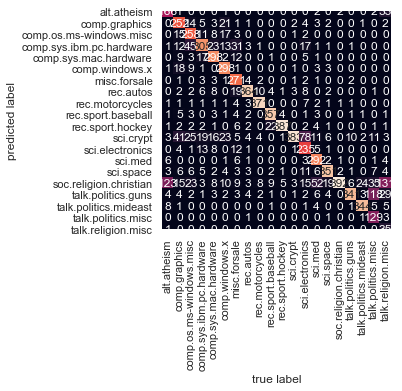

In [9]:
#creating confusion matrix and heat map
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,
            yticklabels=train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')



In [10]:
#Predicting category on new data based on the trained model
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [15]:
print(predict_category('Football'))
print(predict_category('Jesus Christ'))
print(predict_category('Stop Violence '))
print(predict_category('BMW is better than mercedes'))

rec.sport.baseball
soc.religion.christian
talk.politics.guns
rec.autos
